| Wohnfläche (qm) | Preis (EUR) |
| --------------: | ----------: |
|             100 |         400 |
|             150 |         500 |

In [122]:
import numpy as np

# import cupy as np
# np.cuda.Device(0).use()

In [123]:
input_data = [
    [100, 400],
    [150, 500],
    [120, 600], # experiment
    [170, 550]  # experiment
]

In [124]:
def gradientDescentStep(input_data, theta: np.ndarray, alpha):
    n = len(input_data)
    pre_theta = np.zeros(2)
    pre_factor = alpha / n
    for i in range(n):
        x = np.array([1, input_data[i][0]])
        y = input_data[i][1]
        pre_theta = pre_theta + pre_factor * ((y - (theta@x)) * x)
    return theta + pre_theta

In [125]:
alpha = 0.0001055
theta = np.array([100, 3])  # starting point
rounds = 5000000

log_interval = 1000000
snapshot_interval = 1000000

In [126]:
print(f"[0/{rounds}] f(x)={theta[1]} * x + {theta[0]}")
theta_history = [theta]
for i in range(1, rounds + 1):
    theta = gradientDescentStep(input_data, theta, alpha)
    if i % log_interval == 0:
        print(f"[{i}/{rounds}] f(x)={theta[1]} * x + {theta[0]} ({theta})")
    if i % snapshot_interval == 0:
        theta_history.append(theta)

[0/5000000] f(x)=3 * x + 100
[1000000/5000000] f(x)=1.3230487095477974 * x + 333.72761555314156 ([333.72761555   1.32304871])
[2000000/5000000] f(x)=1.2936324773436483 * x + 337.856774626494 ([337.85677463   1.29363248])
[3000000/5000000] f(x)=1.293112794387521 * x + 337.9297225682522 ([337.92972257   1.29311279])
[4000000/5000000] f(x)=1.293103613389287 * x + 337.93101130577276 ([337.93101131   1.29310361])
[5000000/5000000] f(x)=1.2931034511930894 * x + 337.9310340732665 ([337.93103407   1.29310345])


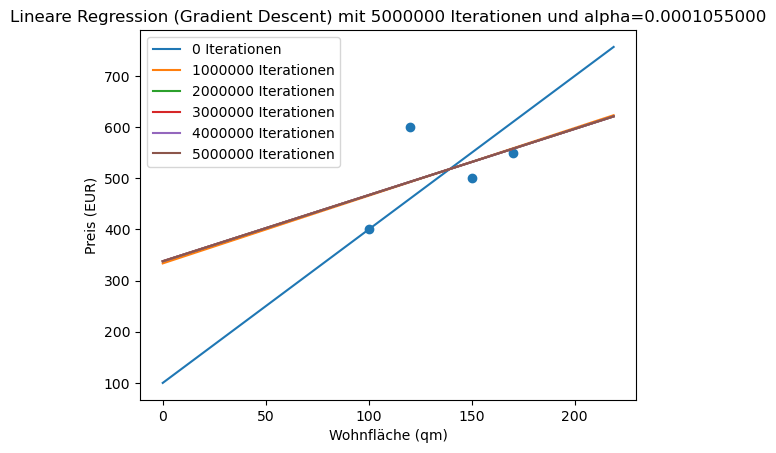

In [127]:
import matplotlib.pyplot as plt

draw_range = range(0, max([x[0] for x in input_data]) + 50)
for i, theta in enumerate(theta_history):
    approximation = np.array([theta[1] * x + theta[0] for x in draw_range])
    plt.plot(draw_range, approximation, label=f"{i * snapshot_interval} Iterationen")
# correct = np.array([2 * x + 200 for x in draw_range])
# plt.plot(draw_range, correct, label="Berechnet mit Normalengleichung")
plt.scatter([x[0] for x in input_data], [x[1] for x in input_data])
plt.xlabel("Wohnfläche (qm)")
plt.ylabel("Preis (EUR)")
plt.title(f"Lineare Regression (Gradient Descent) mit {rounds} Iterationen und alpha={alpha:.10f}")
plt.legend()
plt.show()